In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt

from s7_datasets import load_data_S7_1
from models import model_summary
from utils import train_S7,test_S7,plot_acc_loss_S7

In [8]:
use_cuda = torch.cuda.is_available()  # Check if CUDA (GPU support) is available
device = torch.device("cuda" if use_cuda else "cpu")  # Select GPU if available, otherwise fall back to CPU
device  # Display the selected device

device(type='cpu')

In [9]:
trainloader , testloader = load_data_S7_1()

In [10]:
# def plot_image(loader,no_images):
#     batch_data, batch_label = next(iter(loader))
#     _ = plt.figure()

#     for i in range(no_images):
#         plt.subplot(3,4,i+1)
#         plt.tight_layout()
#         plt.imshow(batch_data[i].squeeze(0), cmap='gray')
#         plt.title(batch_label[i].item())
#         plt.xticks([])
#         plt.yticks([])


# plot_image(trainloader,6)
# plot_image(testloader,6)

In [11]:
class S7_Model(nn.Module):
    def __init__(self):
        super(S7_Model, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7, padding=3, bias=False), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.conv1x1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=28, kernel_size=3, padding=1),  
            nn.BatchNorm2d(28),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=28, out_channels=16, kernel_size=3, padding=1),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(3, 3), padding=1),  
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
        )
        self.conv1x1_2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=4, kernel_size=3, padding=1), 
            nn.BatchNorm2d(4),
            nn.ReLU(),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, padding=1),  
            nn.ReLU(),
            
            
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(8, 10, kernel_size=1),
            nn.AdaptiveAvgPool2d(1),  
        )
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv1x1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv1x1_2(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)  
        x = F.log_softmax(x, dim=1)
        return x


In [12]:

model = S7_Model()
model_summary(model,input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           1,568
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 28, 14, 14]           8,092
       BatchNorm2d-6           [-1, 28, 14, 14]              56
              ReLU-7           [-1, 28, 14, 14]               0
            Conv2d-8           [-1, 16, 14, 14]           4,048
       BatchNorm2d-9           [-1, 16, 14, 14]              32
             ReLU-10           [-1, 16, 14, 14]               0
        MaxPool2d-11             [-1, 16, 7, 7]               0
           Conv2d-12              [-1, 8, 7, 7]           1,160
      BatchNorm2d-13              [-1, 8, 7, 7]              16
             ReLU-14              [-1, 

In [13]:
model = S7_Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_S7(model, device, trainloader, optimizer,criterion)
  test_S7(model, device, testloader, criterion)
  scheduler.step()


c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1387 Batch_id=937 Accuracy=80.82: 100%|██████████| 938/938 [00:33<00:00, 27.60it/s]


Test set: Average loss: 0.0016, Accuracy: 9715/10000 (97.15%)

Epoch 2


Train: Loss=0.2956 Batch_id=937 Accuracy=95.71: 100%|██████████| 938/938 [00:57<00:00, 16.25it/s]


Test set: Average loss: 0.0011, Accuracy: 9802/10000 (98.02%)

Epoch 3


Train: Loss=0.0391 Batch_id=937 Accuracy=96.79: 100%|██████████| 938/938 [00:57<00:00, 16.42it/s]


Test set: Average loss: 0.0010, Accuracy: 9832/10000 (98.32%)

Epoch 4


Train: Loss=0.1537 Batch_id=937 Accuracy=97.36: 100%|██████████| 938/938 [00:56<00:00, 16.56it/s]


Test set: Average loss: 0.0009, Accuracy: 9816/10000 (98.16%)

Epoch 5


Train: Loss=0.1263 Batch_id=937 Accuracy=97.52: 100%|██████████| 938/938 [00:55<00:00, 16.79it/s]


Test set: Average loss: 0.0007, Accuracy: 9875/10000 (98.75%)

Epoch 6


Train: Loss=0.0809 Batch_id=937 Accuracy=97.85: 100%|██████████| 938/938 [00:56<00:00, 16.66it/s]


Test set: Average loss: 0.0006, Accuracy: 9881/10000 (98.81%)

Epoch 7


Train: Loss=0.1190 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:57<00:00, 16.41it/s]


Test set: Average loss: 0.0006, Accuracy: 9879/10000 (98.79%)

Epoch 8


Train: Loss=0.0527 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:58<00:00, 16.17it/s]


Test set: Average loss: 0.0007, Accuracy: 9880/10000 (98.80%)

Epoch 9


Train: Loss=0.1184 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:57<00:00, 16.19it/s]


Test set: Average loss: 0.0007, Accuracy: 9865/10000 (98.65%)

Epoch 10


Train: Loss=0.0553 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:57<00:00, 16.32it/s]


Test set: Average loss: 0.0006, Accuracy: 9889/10000 (98.89%)

Epoch 11


Train: Loss=0.0087 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:57<00:00, 16.20it/s]


Test set: Average loss: 0.0007, Accuracy: 9891/10000 (98.91%)

Epoch 12


Train: Loss=0.0419 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:58<00:00, 16.10it/s]


Test set: Average loss: 0.0005, Accuracy: 9906/10000 (99.06%)

Epoch 13


Train: Loss=0.0610 Batch_id=937 Accuracy=98.54: 100%|██████████| 938/938 [01:00<00:00, 15.62it/s]


Test set: Average loss: 0.0005, Accuracy: 9899/10000 (98.99%)

Epoch 14


Train: Loss=0.0638 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:01<00:00, 15.30it/s]


Test set: Average loss: 0.0005, Accuracy: 9915/10000 (99.15%)

Epoch 15


Train: Loss=0.0067 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [01:02<00:00, 14.90it/s]


Test set: Average loss: 0.0005, Accuracy: 9915/10000 (99.15%)



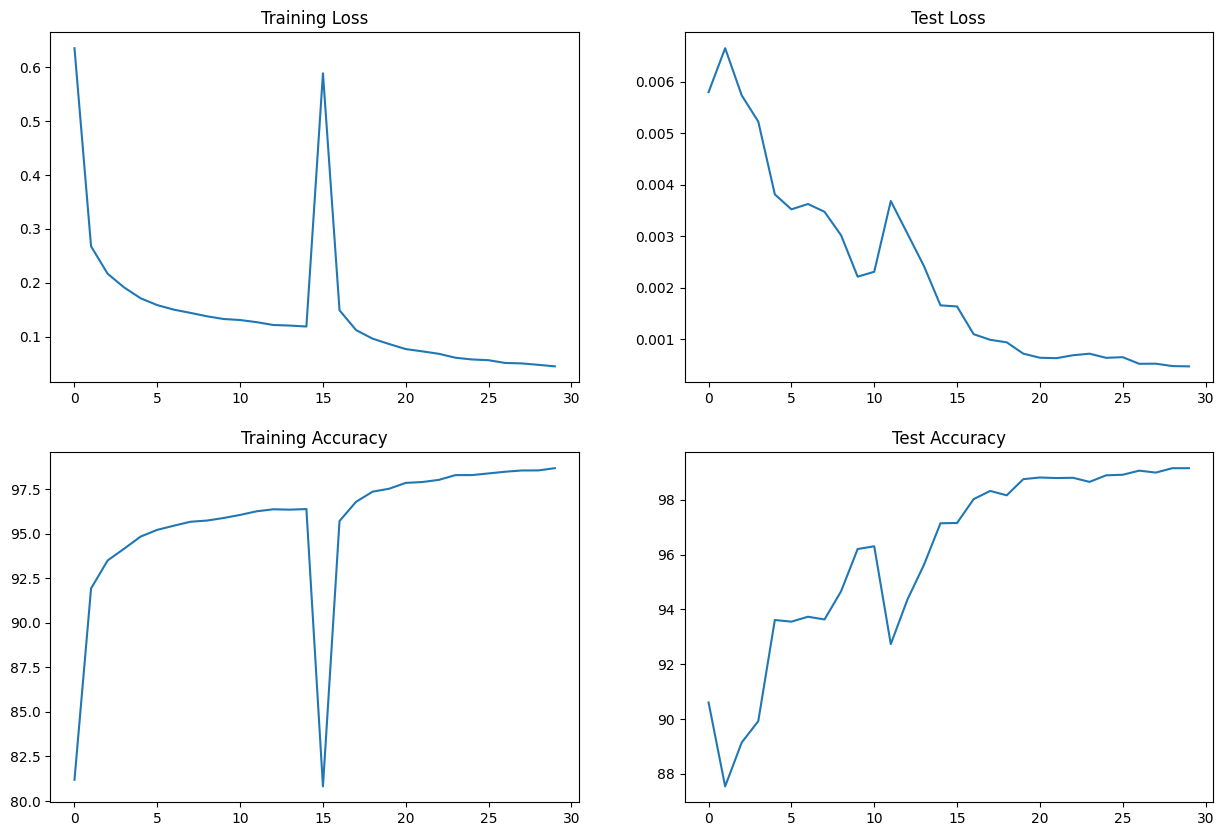

In [14]:
plot_acc_loss_S7()